In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    # if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    # similarity = dot_product / (norm_vec1 )
    # similarity = dot_product
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

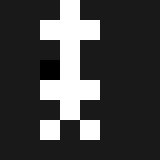

In [13]:

smiley_pattern = np.array([ 
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1,1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1 ],
        [0.1,0.1,0, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.08100262 0.56546517 0.05156038]
  [0.88018738 0.75400379 0.27887613]
  [0.25786324 0.58652185 0.31881253]
  [0.75796692 0.09946226 0.8781336 ]
  [0.58534115 0.42164377 0.50929482]
  [0.58068762 0.59406674 0.16446199]
  [0.30843365 0.24847002 0.08942001]
  [0.54969648 0.18511632 0.06864728]]

 [[0.03609584 0.52676177 0.58433599]
  [0.47320239 0.51513612 0.04994683]
  [0.49464571 0.45775766 0.0945768 ]
  [0.35189471 0.41877027 0.30145084]
  [0.08408623 0.95875279 0.31357247]
  [0.79425925 0.29882269 0.41882278]
  [0.66433219 0.7425567  0.8134788 ]
  [0.70498128 0.92639996 0.94559833]]

 [[0.54575801 0.88238375 0.71081742]
  [0.3744

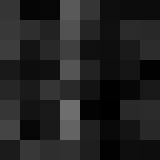

Current loss: 1.4405380492334103


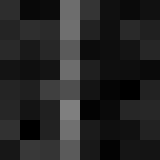

Current loss: 1.3314353220321784


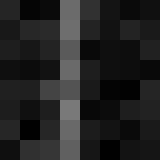

Current loss: 1.2854515284620842


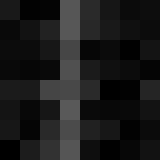

Current loss: 1.2098049309389645


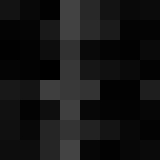

Current loss: 1.1749972401081288


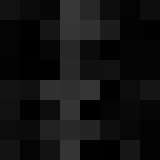

Current loss: 1.1554999873057294


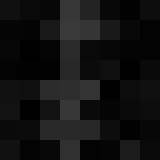

Current loss: 1.130181586437686


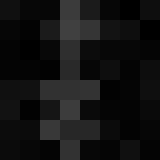

Current loss: 1.0969590218903393


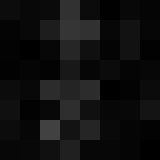

Current loss: 1.0806426859289564


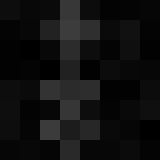

Current loss: 1.067515391126954


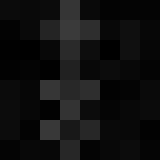

Current loss: 1.058436240476882


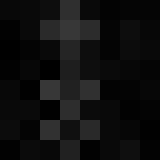

Current loss: 1.0505333043299978


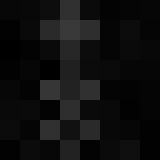

Current loss: 1.0456999112035317


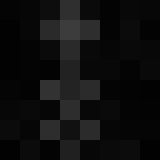

Current loss: 1.0402485592243804


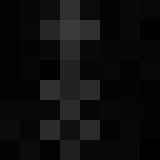

Current loss: 1.0367554979468392


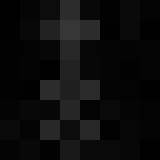

Current loss: 1.0333987581820923


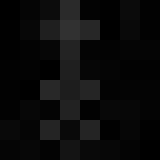

Current loss: 1.029748127208253


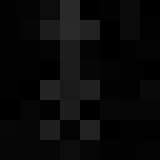

Current loss: 1.0284608657890282


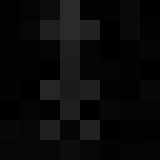

Current loss: 1.026337872993472


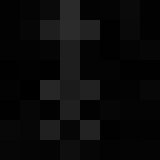

Current loss: 1.0231710855945821


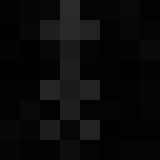

Current loss: 1.020689083990058


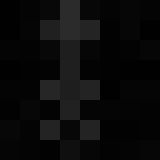

Current loss: 1.0190985728311415


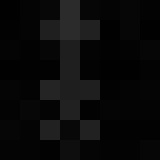

Current loss: 1.01775488051164


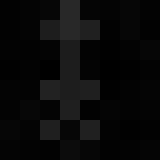

Current loss: 1.015496885202526


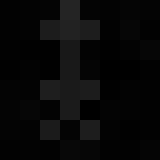

Current loss: 1.0128371234348057


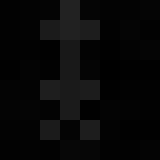

Current loss: 1.0113985379231034


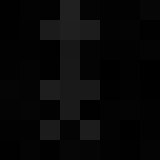

Current loss: 1.0098434249570447


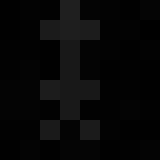

Current loss: 1.0084746290543034


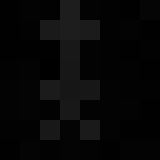

Current loss: 1.0067633620554126


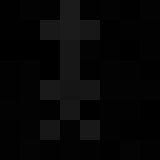

Current loss: 1.0060900787111575


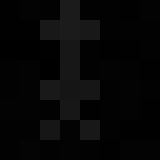

Current loss: 1.0051317650592675


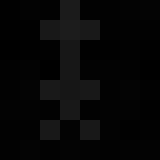

Current loss: 1.0048140182102097


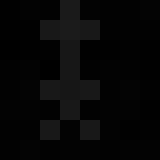

Current loss: 1.004295358950864


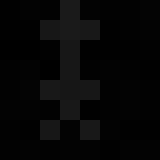

Current loss: 1.0036428829416486


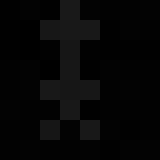

Current loss: 1.003228087405438


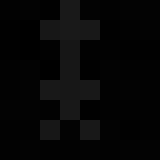

Current loss: 1.002824221772545


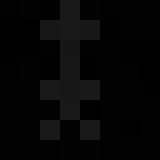

Current loss: 1.0023417089058777


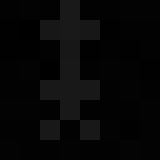

Current loss: 1.0021040412638509


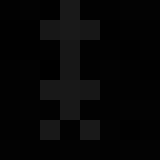

Current loss: 1.001867380604958


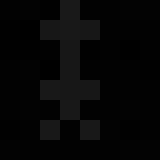

Current loss: 1.001703067023483


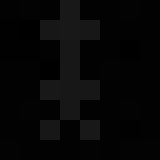

Current loss: 1.0015986092968077


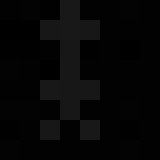

Current loss: 1.0015178024690765


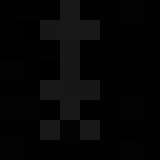

Current loss: 1.0014491823412486


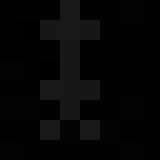

Current loss: 1.001398154118082


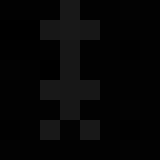

Current loss: 1.0013228794086606


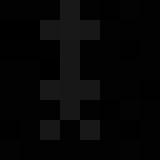

Current loss: 1.0012292013259332


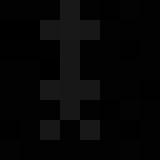

Current loss: 1.001158805304825


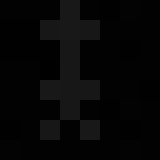

Current loss: 1.0011025891967082


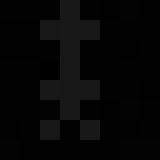

Current loss: 1.0010620279956035


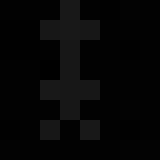

Current loss: 1.0010167177882265


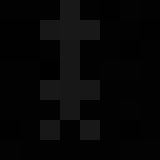

Current loss: 1.0009584629007315


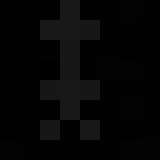

Current loss: 1.0009047415813508


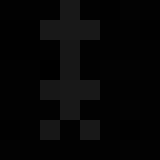

Current loss: 1.0008524852551726


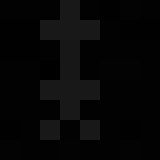

Current loss: 1.0007836607706142


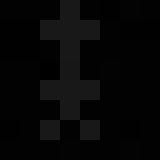

Current loss: 1.000711017421474


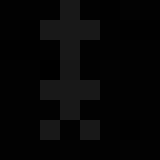

Current loss: 1.0006242626615331


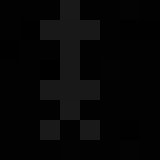

Current loss: 1.0005537408665421


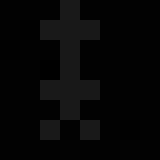

Current loss: 1.0005049471416523


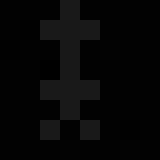

Current loss: 1.0004622476240443


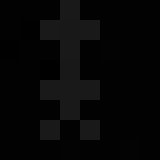

Current loss: 1.00040848310078


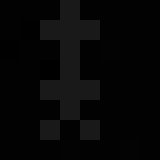

Current loss: 1.0003560869840145


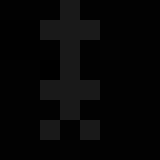

Current loss: 1.0003175158416586


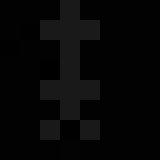

Current loss: 1.0002910347438627


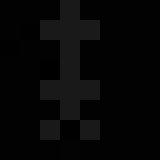

Current loss: 1.0002684247593212


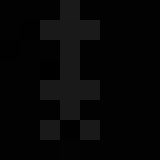

Current loss: 1.0002495851921325


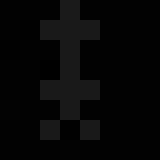

Current loss: 1.0002349419723282


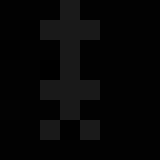

Current loss: 1.0002197447789776


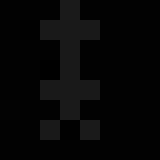

Current loss: 1.000203404890528


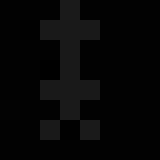

Current loss: 1.000187054781232


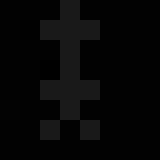

Current loss: 1.0001728709019078


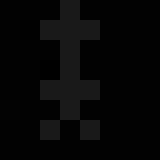

Current loss: 1.0001611239659696


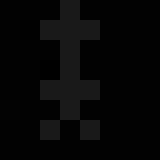

Current loss: 1.0001508392011527


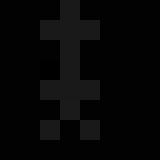

Current loss: 1.0001414595681701


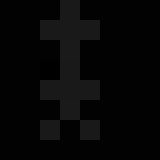

Current loss: 1.0001333460595967


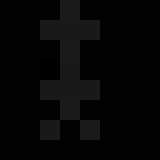

Current loss: 1.0001257874719263


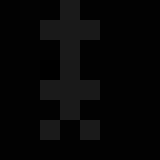

Current loss: 1.0001179845335009


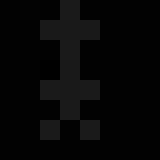

Current loss: 1.0001100993887782


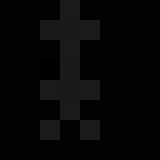

Current loss: 1.0001028900338933


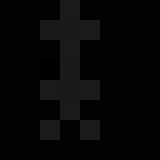

Current loss: 1.0000961838294344


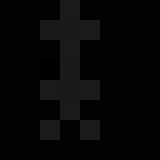

Current loss: 1.0000897299736706


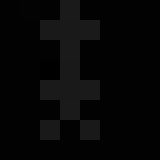

Current loss: 1.0000835146429878


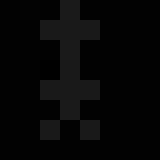

Current loss: 1.0000778574230182


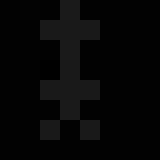

Current loss: 1.0000726686678585


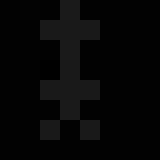

Current loss: 1.000067127039684


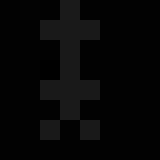

Current loss: 1.0000612148702992


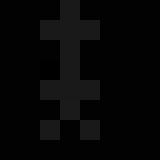

Current loss: 1.0000553939848733


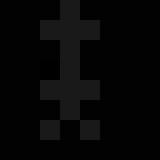

Current loss: 1.0000496987654226


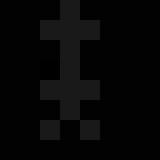

Current loss: 1.0000435347670726


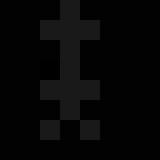

Current loss: 1.0000370765921178


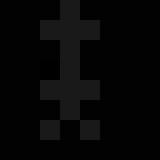

Current loss: 1.0000320444949617


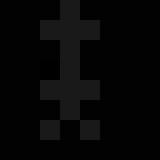

Current loss: 1.0000290071037432


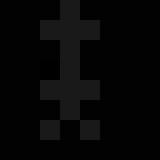

Current loss: 1.0000269454095594


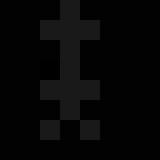

Current loss: 1.0000248524810258


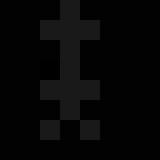

Current loss: 1.0000226559874124


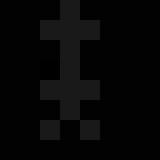

Current loss: 1.0000207532883425


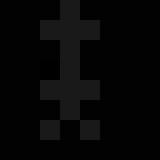

Current loss: 1.0000192991429377


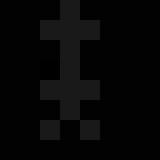

Current loss: 1.0000180455605288


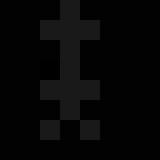

Current loss: 1.0000167820183172


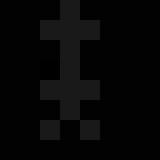

Current loss: 1.0000156074310893


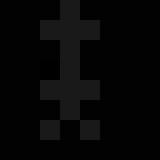

Current loss: 1.0000146313092158


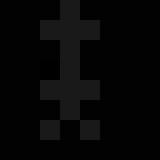

Current loss: 1.0000137953298183


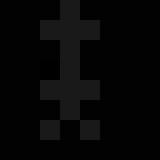

Current loss: 1.0000130249557952


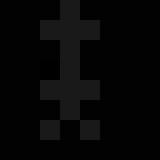

Current loss: 1.0000122419181567


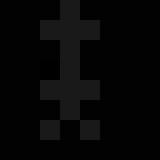

Current loss: 1.000011538466609


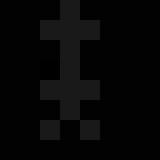

Current loss: 1.0000110047105373


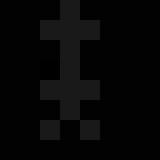

Current loss: 1.000010532129015


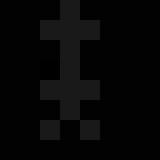

Current loss: 1.0000100006619368


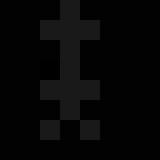

Current loss: 1.0000093809136896


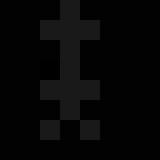

Current loss: 1.0000087627716228


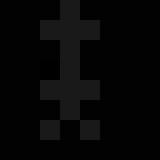

Current loss: 1.0000082426753705


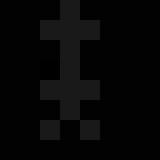

Current loss: 1.0000078061156377


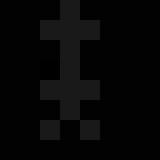

Current loss: 1.000007398301151


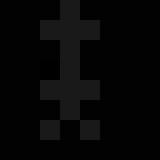

Current loss: 1.0000069721496474


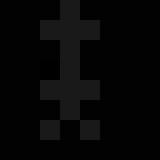

Current loss: 1.0000065845544621


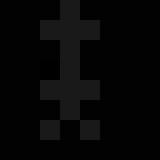

Current loss: 1.0000062478224594


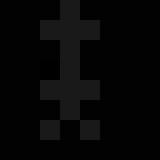

Current loss: 1.000005884024613


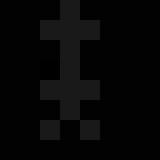

Current loss: 1.0000054783062649


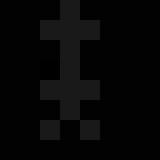

Current loss: 1.000005063167051


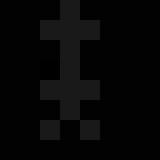

Current loss: 1.0000047019266178


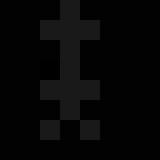

Current loss: 1.000004398685807


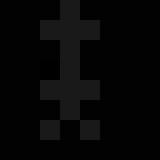

Current loss: 1.0000041542771698


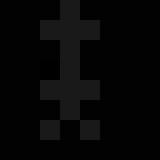

Current loss: 1.0000039754029582


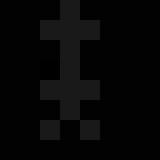

Current loss: 1.000003824802739


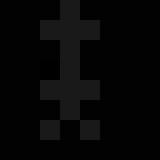

Current loss: 1.0000036518314006


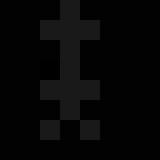

Current loss: 1.0000034324584703


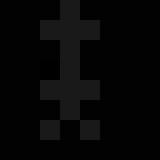

Current loss: 1.000003197379021


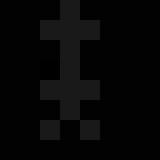

Current loss: 1.000002996865888


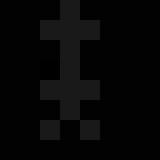

Current loss: 1.0000028515131427


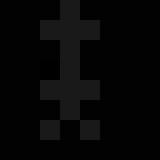

Current loss: 1.0000027411816343


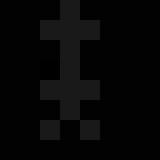

Current loss: 1.0000026458574167


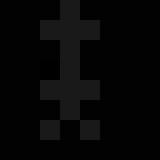

Current loss: 1.0000025637044565


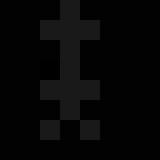

Current loss: 1.0000024870019755


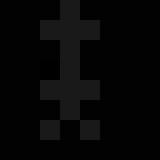

Current loss: 1.0000023985220488


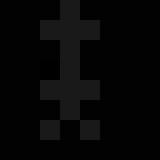

Current loss: 1.0000022933474912


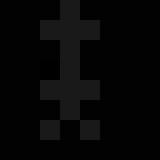

Current loss: 1.000002181034808


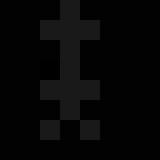

Current loss: 1.000002070007879


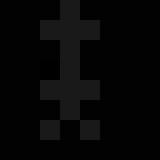

Current loss: 1.0000019558801319


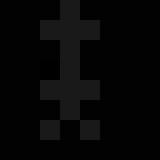

Current loss: 1.000001832506828


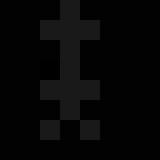

Current loss: 1.000001710479895


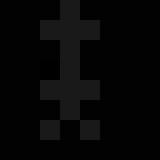

Current loss: 1.0000016095031965


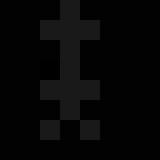

Current loss: 1.0000015334598618


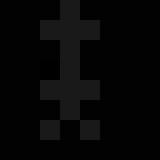

Current loss: 1.0000014671290298


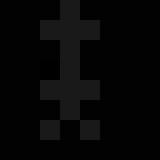

Current loss: 1.0000013921073907


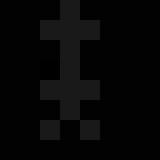

Current loss: 1.0000012949252008


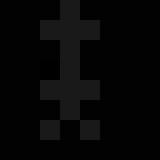

Current loss: 1.0000011788698446


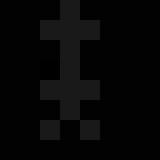

Current loss: 1.0000010714472694


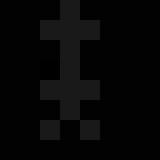

Current loss: 1.000000996086939


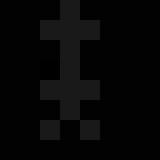

Current loss: 1.0000009462138046


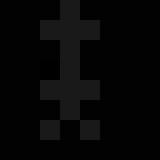

Current loss: 1.0000009034264763


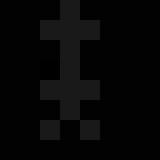

Current loss: 1.0000008549524813


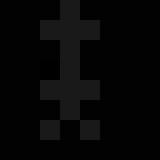

Current loss: 1.000000793958071


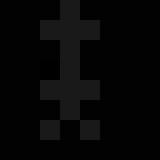

Current loss: 1.0000007281964554


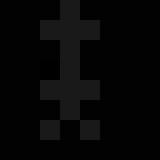

Current loss: 1.0000006738443208


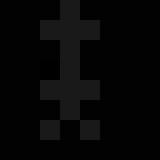

Current loss: 1.0000006375914496


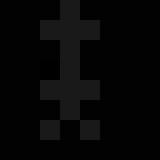

Current loss: 1.000000611212337


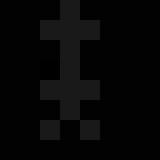

Current loss: 1.000000583276372


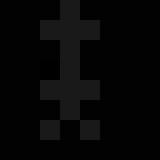

Current loss: 1.0000005424601315


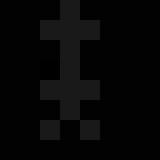

Current loss: 1.0000004820817527


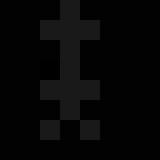

Current loss: 1.0000004118263544


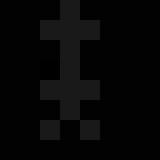

Current loss: 1.0000003610395816


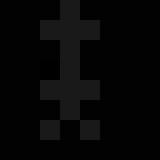

Current loss: 1.0000003398321522


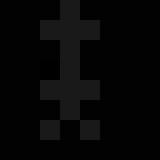

Current loss: 1.0000003308660823


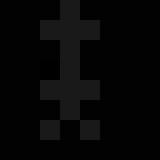

Current loss: 1.000000322171245


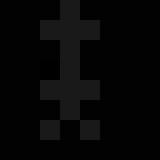

Current loss: 1.0000003101375374


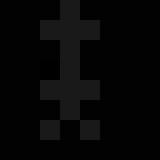

Current loss: 1.0000002946045388


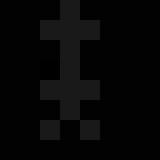

Current loss: 1.0000002759833115


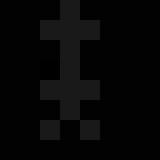

Current loss: 1.00000025368597


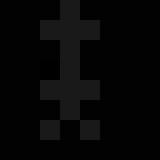

Current loss: 1.000000227088384


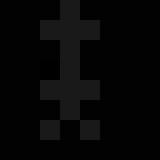

Current loss: 1.0000001982701088


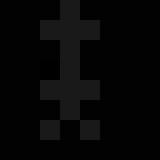

Current loss: 1.0000001730781438


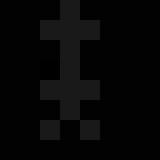

Current loss: 1.000000151691467


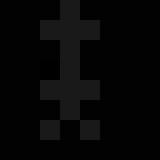

Current loss: 1.0000001313668319


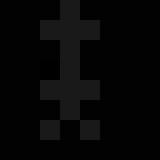

Current loss: 1.0000001116839814


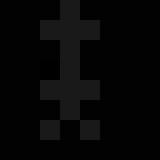

Current loss: 1.0000000983358452


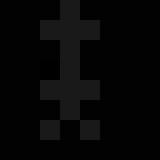

Current loss: 1.000000092724136


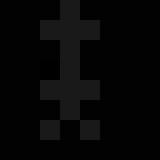

Current loss: 1.0000000901006167


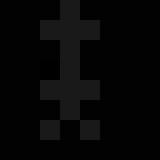

Current loss: 1.0000000866823284


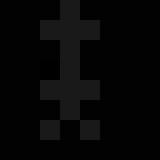

Current loss: 1.0000000808634828


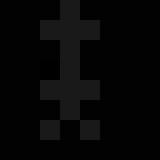

Current loss: 1.000000070859697


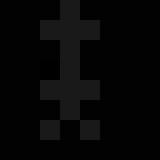

Current loss: 1.0000000546198533


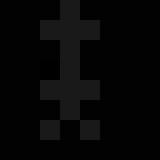

Current loss: 1.0000000338014041


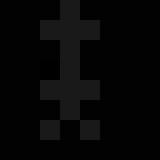

Current loss: 1.0000000247797365


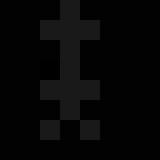

Current loss: 1.0000000196810874


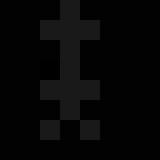

Current loss: 1.0000000183312812


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1/(score)
    # return -score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 8.10011857e-02  6.11396603e-01  3.63386203e-01  8.80191435e-01
  9.44751690e-01  1.11251318e+00  2.57860646e-01  1.69963910e-01
  3.08259283e-01  7.57966094e-01  1.02561877e+00  6.77412946e-01
  5.85335591e-01  7.26029369e-01  5.37776385e-01  5.80688962e-01
  1.31495743e+00 -4.32663292e-02  3.08435490e-01  2.34912490e-01
  4.10814127e-01  5.49695401e-01  4.00638475e-01 -3.78454781e-02
 -1.88601147e-01  4.50084187e-01  4.27848831e-01  5.03512992e-01
  1.68857744e-01  1.03191625e-01  1.08391965e+00  3.28307009e-01
 -2.29088983e-04  2.75604344e-01  8.40767826e-01 -4.58521392e-02
  7.77280447e-01  6.07259776e-01 -7.33300080e-01  1.16737515e+00
  8.92560138e-01 -4.57089932e-01  7.72148996e-01  6.85805131e-01
  3.87863067e-01  1.19307699e+00  1.06701580e+00  1.60506598e+00
  1.77120171e+00  7.75172476e-01  4.91317680e-01 -2.67445700e-01
  4.01381760e-01  1.20582271e+00  8.27842530e-01  4.46378606e-01
  1.28136929e-01  4.41107115e-01  1.90889325e-01  1.07088969e-02
  9

[[9.96323533e-03 9.94412335e-03 9.94550128e-03 9.94184139e-02
  9.93924216e-03 9.94608121e-03 9.94151580e-03 9.92831610e-03]
 [9.91982074e-03 9.95026029e-03 9.94097985e-02 9.94057662e-02
  9.94110298e-02 9.93149983e-03 9.93905762e-03 9.94195325e-03]
 [9.94027191e-03 9.95608286e-03 9.93941868e-03 9.94266026e-02
  9.94213307e-03 9.93227146e-03 9.94682301e-03 9.93907966e-03]
 [9.92863156e-03 9.92947156e-03 1.04702560e-05 9.93980977e-02
  9.94120177e-03 9.93720011e-03 9.94477226e-03 9.93232698e-03]
 [9.95312746e-03 9.94445384e-03 9.94150158e-02 9.93993185e-02
  9.94137796e-02 9.93959329e-03 9.94768748e-03 9.94355226e-03]
 [9.94363581e-03 9.93848057e-03 9.93907211e-03 9.94173964e-02
  9.94464681e-03 9.93906184e-03 9.94939267e-03 9.94777100e-03]
 [9.92448278e-03 9.95691523e-03 9.94187079e-02 9.95781770e-03
  9.94049256e-02 9.94274933e-03 9.94668406e-03 9.95279864e-03]
 [9.92854136e-03 9.94493904e-03 9.94320836e-03 9.93911847e-03
  9.94002234e-03 9.93744445e-03 9.93701446e-03 9.93781039e-03]]

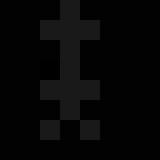

Current loss: 1.0000000183312812


In [23]:
vec1 = smiley_pattern_vec
vec2 = np.array(feature_map(image_arr))
# vec1, vec2 = np.array(vec1), np.array(vec2)
dot_product = np.dot(vec1, vec2)
norm_vec1 = np.linalg.norm(vec1)
norm_vec2 = np.linalg.norm(vec2)
# if(norm_vec2*norm_vec1==0): return 0
similarity = dot_product / (norm_vec1 * norm_vec2)
print(norm_vec1*norm_vec2)
print(1/similarity)


1.2436409066588623
1.0000000183312812


array([[1.23906870e-02, 1.23669186e-02, 1.23686322e-02, 1.23640806e-01,
        1.23608481e-02, 1.23693534e-02, 1.23636757e-02, 1.23472600e-02],
       [1.23366949e-02, 1.23745507e-02, 1.23630092e-01, 1.23625077e-01,
        1.23631623e-01, 1.23512194e-02, 1.23606186e-02, 1.23642197e-02],
       [1.23621288e-02, 1.23817919e-02, 1.23610677e-02, 1.23650990e-01,
        1.23644434e-02, 1.23521791e-02, 1.23702760e-02, 1.23606460e-02],
       [1.23476524e-02, 1.23486970e-02, 1.30212387e-05, 1.23615540e-01,
        1.23632852e-02, 1.23583086e-02, 1.23677256e-02, 1.23522481e-02],
       [1.23781165e-02, 1.23673296e-02, 1.23636580e-01, 1.23617059e-01,
        1.23635043e-01, 1.23612848e-02, 1.23713511e-02, 1.23662084e-02],
       [1.23663123e-02, 1.23599010e-02, 1.23606367e-02, 1.23639541e-01,
        1.23675696e-02, 1.23606239e-02, 1.23734717e-02, 1.23714549e-02],
       [1.23424928e-02, 1.23828271e-02, 1.23641172e-01, 1.23839494e-02,
        1.23624032e-01, 1.23652098e-02, 1.23701032e-02, 1.

[[1.23906870e-02 1.23669186e-02 1.23686322e-02 1.23640806e-01
  1.23608481e-02 1.23693534e-02 1.23636757e-02 1.23472600e-02]
 [1.23366949e-02 1.23745507e-02 1.23630092e-01 1.23625077e-01
  1.23631623e-01 1.23512194e-02 1.23606186e-02 1.23642197e-02]
 [1.23621288e-02 1.23817919e-02 1.23610677e-02 1.23650990e-01
  1.23644434e-02 1.23521791e-02 1.23702760e-02 1.23606460e-02]
 [1.23476524e-02 1.23486970e-02 1.30212387e-05 1.23615540e-01
  1.23632852e-02 1.23583086e-02 1.23677256e-02 1.23522481e-02]
 [1.23781165e-02 1.23673296e-02 1.23636580e-01 1.23617059e-01
  1.23635043e-01 1.23612848e-02 1.23713511e-02 1.23662084e-02]
 [1.23663123e-02 1.23599010e-02 1.23606367e-02 1.23639541e-01
  1.23675696e-02 1.23606239e-02 1.23734717e-02 1.23714549e-02]
 [1.23424928e-02 1.23828271e-02 1.23641172e-01 1.23839494e-02
  1.23624032e-01 1.23652098e-02 1.23701032e-02 1.23777075e-02]
 [1.23475402e-02 1.23679330e-02 1.23657807e-02 1.23606943e-02
  1.23618184e-02 1.23586124e-02 1.23580777e-02 1.23590675e-02]]

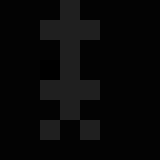

Current loss: 1.0000000183312812


In [25]:
original_length = np.prod(shape_p)
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
weights_p1 = weights_p1_flat.reshape(shape_p)
image_arr = []
for i in range(n_qubits):
    arr = circuit(weights_p1,i)
    # largest_elements, indices = find_n_largest_numbers(arr, 1)
    # Convert indices to binary
    # binary_indices = indices_to_binary(indices)
    # print(binary_indices)
    # print(arr)
    image_arr.append(arr)
image_arr=abs(np.array(image_arr))
image_arr=norm_vec1*norm_vec2*image_arr
print(image_arr)
print()
binary_array_to_png_and_display(image_arr,scale_factor=20)
print("Current loss:", objective(params))

In [16]:
res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index